# 1차 해커톤 데이터 분석 및 시각화 프로젝트

주제: [League of Legends Diamond Ranked Games (10 min)
](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)   
리그오브레전드 다이아 랭크게임 10분까지 데이터를 보고 결과 예측하기   
이번 1차 해커톤은 데이터 분석과 시각화에 초점 맞추기

---

운 좋게 실리콘벨리에서 근무하고 계시는 정현준님 세미나를 듣게 됐는데, 그 때 데이터 분석 CDA에 대해 알게 되었다. 둘의 특징을 정리해봤다.   

- CDA: 이미 갖고 있는 인사이트나 가설을 검증하기 위해 데이터를 분석한다. 하지만 해당 가설의 검증 결과에 집중하기 위해 유의미한 인사이트를 주는 지표를 놓칠 수 있다.
- EDA: 데이터를 선입견 없이 유연하게 탐색해본다. 반대로 생각해보면 명확한 분석 목표가 없어 방황할 수 있다.

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbjxLqR%2FbtrmNokfrS0%2FWsGuSlQZTOUw21FUeyRmdK%2Fimg.png)

CDA 방식을 사용해서 데이터를 분석하면 features들이 얼마나 영향을 미치는지 볼 수 있다고 얘기해주신게 기억에 남아, 기존에 많이 경험해본 EDA(탐색적 자료 분석) 방식이 아닌 CDA(확증적 자료 분석) 방식을 통해 데이터를 풀어내기 위해 노력했다.   
처음부터 가설을 설정하고 데이터를 수집한게 아닌 갖고 있는 데이터를 활용한다는 점이 아쉽지만, 주어진 데이터에 가설을 제시하고 이에 대한 타당성을 검토하고 분석하는 과정을 거쳤다.


다양한 데이터셋(리그 오브 레전드, 코로나, 전력사용량, 넷플릭스, KBO)중 리그 오브 레전드 데이터셋을 선택한 가장 큰 이유는 내가 갖고 있는 인사이트를 통해 가설을 세울 때 친숙하여 접근성이 가장 크다고 생각했다. 그리고 타겟값이 승리 혹은 패배로 확실해 가설을 정리하기에 비교적 좋아보였다.

# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
csv_path = os.getenv('HOME')+'/aiffel/AI_study/Hackathon/H01_lol/high_diamond_ranked_10min.csv'
df = pd.read_csv(csv_path)

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
df.shape

(9879, 40)

features들이 갖는 대소관계를 통해 현재 우위 상황을 판단하고 entropy를 나타내는 __decision tree 사용하기__   
특히 이는 features들의 값들이 갖고 있는 정보 이득을 비교 및 확인할 수 있음   

만약 위와 같은 가설을 적용할 경우 해야하는 투두 리스트
1. 대소관계를 표현할 수 있는 features들만 남기기
2. 남긴 정보들의 오차를 계산해서 새로운 columns를 만들기

---

먼저 raw data들로 결과를 보고싶어서 따로 전처리 없이 진행하기   
여기서 target값인 `blueWins`랑 고유의 ID값을 갖고 있는 `gameId` columns는 제외하고 진행하자

In [5]:
df.columns, df.columns.shape

(Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
        'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
        'blueEliteMonsters', 'blueDragons', 'blueHeralds',
        'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
        'blueTotalExperience', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
        'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
        'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
        'redTotalGold', 'redAvgLevel', 'redTotalExperience',
        'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
        'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
       dtype='object'),
 (40,))

In [6]:
using_cols = df.columns[2:]
using_cols, using_cols.shape # 제거 확인

(Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
        'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
        'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
        'blueTotalExperience', 'blueTotalMinionsKilled',
        'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
        'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
        'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
        'redTotalGold', 'redAvgLevel', 'redTotalExperience',
        'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
        'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
       dtype='object'),
 (38,))

In [7]:
X = df[using_cols] # using columns
y = df['blueWins'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1,
                             max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7317813765182186


크기가 너무 커져 `max_depth`를 5로 맞췄다.

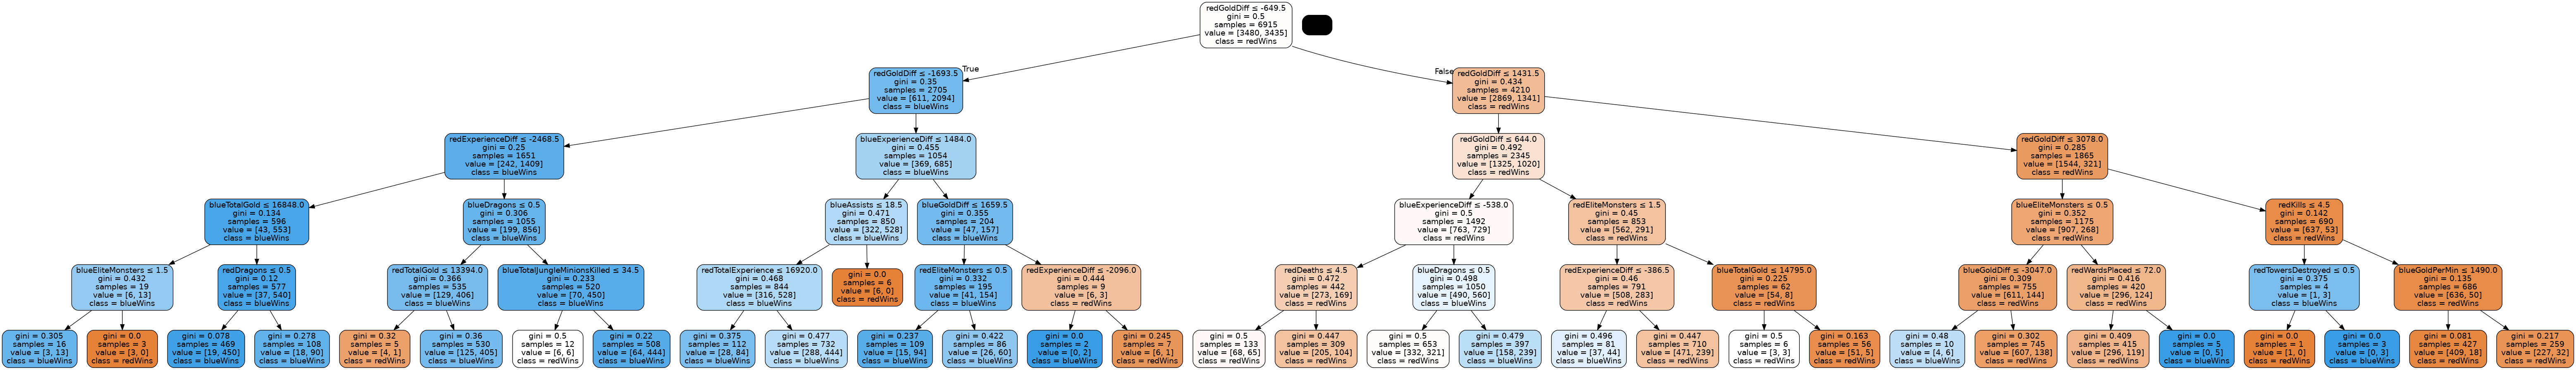

In [9]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=using_cols, 
                class_names=['redWins','blueWins']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('row_df.png')
Image(graph.create_png(), retina=True)

# 2. 가설 세우기

CDA 방식으로 접근 및 데이터 분석하기 위해 features 항목과 인사이트를 통해 가설을 세워보자.   

1. 롤은 시야가 중요하다. 시야를 통해 이득을 취할 수 있는 스노우볼을 굴릴 요소들을 쉽게 확인할 수 있다. 그래서 `WardsPlaced`, `WardsDestroyed`를 비교해 봤을 때 placed가 높을 수록 시야를 잘 먹었음을 의미하고 이는 곧 많은 이득을 얻어 게임을 승리로 이끄는 지표다.

2. 아이템이 잘 나와야 전투에서 승리하고 이는 게임의 승리를 야기한다. 아이템을 뽑기 위해 골드 수급이 상대편보다 원활해야 하는데, 이는 `Kills`, `Deaths`, `Assists`, `TowersDestroyed`, `TotalMinionsKilled`, `TotalJungleMinionsKilled`를 통해 알 수 있다. 그리고 이들을 잘 챙기면 경험치인 `ExperienceDiff`에서 차이가 날것이다.   
최종적으로 이들의 차이를 내포하고 있는 `GoldDiff` 지표가 승리에 가장 중요하다.

3. 데이터셋이 10분까지 데이터만 표현하고 있는 상황이다. `EliteMonsters`에 해당하는 `Dragons`와 `Heralds`는 각 5분 젠, 8분 젠이므로 최대 1개 표현이 가능하고, 전략적으로 이들을 무시하고 다른곳에 집중하는 경우도 많아 승리와 연관이 없을것이다.

4. 정글러는 라이너들과 합류해 소규모 싸움에 쉽게 개입할 수 있는 큰 장점을 갖고 있다. 이는 초반 10분 정글러의 영향력이 매우 중요함을 말한다. 그래서 정글러와 직접적인 영향을 갖고 있는 `'Assists', 'EliteMonsters', 'Dragons', 'Heralds', 'TotalJungleMinionsKilled'` 지표가 승리에 중요하다.

---

# 3. 데이터 전처리 및 시각화

레드팀 승리와 블루팀 승리 확인하기

<AxesSubplot:xlabel='whoWins', ylabel='count'>

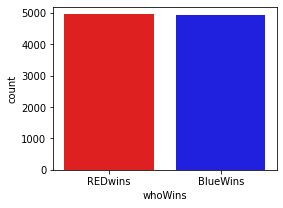

In [10]:
df['whoWins'] = df.blueWins.map({0:"REDwins", 1:"BlueWins"})
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='whoWins', palette=['red', 'blue'])

In [11]:
df.whoWins.value_counts()

REDwins     4949
BlueWins    4930
Name: whoWins, dtype: int64

데이터 전처리를 들어가기전에 비슷한 유형의 features값이 많아 상관관계를 분석하고 필터링을 먼저 진행하자

In [12]:
# 결측치 확인
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [13]:
using_cols = df.columns[1:] # gameId 제외
df = df[using_cols]
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,whoWins
0,0,28,2,1,9,6,11,0,0,0,...,16567,6.8,17047,197,55,-643,8,19.7,1656.7,REDwins
1,0,12,1,0,5,5,5,0,0,0,...,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,REDwins
2,0,15,0,0,7,11,4,1,1,0,...,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,REDwins
3,0,43,1,0,4,5,5,1,0,1,...,16478,7.0,17961,235,47,1321,7,23.5,1647.8,REDwins
4,0,75,4,0,6,6,6,0,0,0,...,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,REDwins


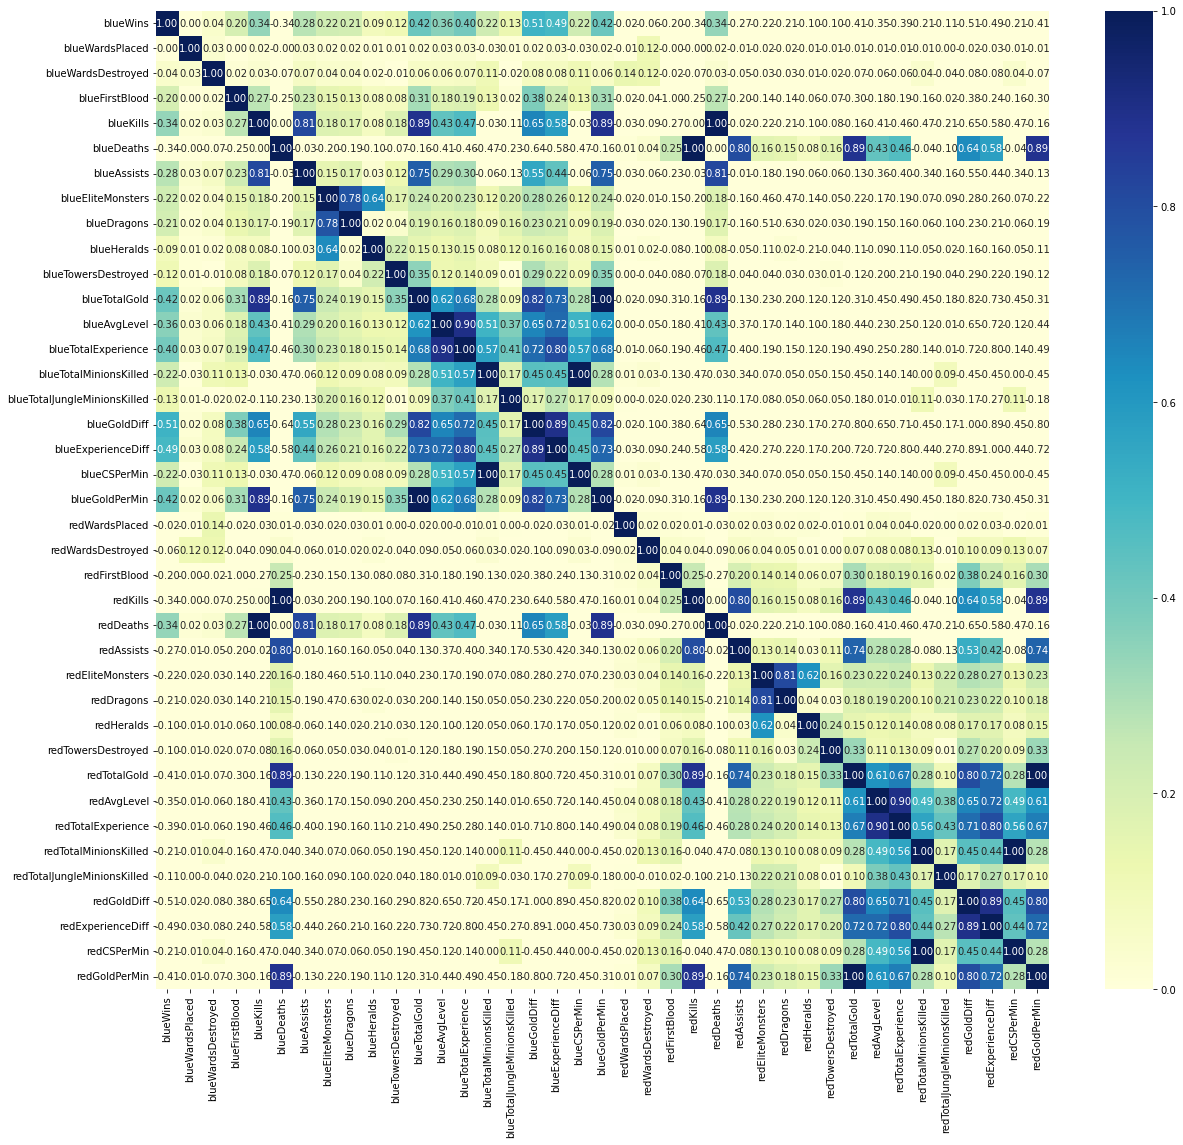

In [14]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True, fmt='.2f', vmin=0)

plt.show()

features를 보고 상관관계 및 인과관계를 분석해보자.

- `redDeaths`, `blueKills` / `redKills`, `blueDeaths`   
A가 커지면 B도 커지는 패턴으로 킬, 데스중 하나만 사용하거나, 둘의 차이를 계산해 어느정도의 차이를 가져야 승리에 영향을 가지는지 확인해도 좋을거같다. kills 차이를 `killsDiff`로 만들어 값을 넣자.
- `TotalGold`, `GoldPerMin`, `TotalMinionsKilled`, `CSPerMin`, 
Total과 PerMin중 하나만 사용해도 무관해보인다. 

- `WardsPlaced`, `WardsDestroyed`
__가설 1번__ 시야 싸움을 확인하기에 유용해보인다. 

히트맵을 통한 __상관관계__ 를 분석해보자.   

- blueWins와 상관관계가 높은건 순서대로 정리하면 다음과 같다.   
`blueGoldDiff`, `blueExperienceDiff`, `blueTotalGold`, `blueGoldPermin`, `blueTotalExperience`, `blueAvgLevel`, `blueKills`, `redDeaths`, `blueEliteMonsters`, `blueTotalMinionsKilled`, `blueCSPerMin`, `blueDragons`, `blueFirstBlood`   

히트맵을 통한 상관관계는 __가설 2번을 뒷받침하고 있다.__

In [15]:
# 가설 1번. 시야 싸움에서 이겼는지 확인하기 위해 와드 설정 
# 제 역할을 끝까지 한 와드 = (설치한 와드 - 지워진 와드)
df['blueSaveWards'] = df['blueWardsPlaced'] - df['blueWardsDestroyed']
df['redSaveWards'] = df['redWardsPlaced'] - df['redWardsDestroyed']
df['saveWardsDiff'] = df['blueSaveWards'] - df['redSaveWards']


# 가설 2번. 골드 수급 체크
# 양수면 블루가 돈을 더 벌고, 음수면 레드가 돈을 더 벌었음을 의미함
df['killsDiff'] = df['blueKills'] - df['redKills']
df['minionsKilledDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']
df['towerDestroyedDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed']
df['jungleMinionsKilledDiff'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled']

df['totalGoldDiff'] = df['blueTotalGold'] - df['redTotalGold']
df['experienceDiff'] = df['blueExperienceDiff'] - df['redExperienceDiff']



# 필요한 columns 할당
preprocessing_using_cols = ['blueWins', 'saveWardsDiff', 'killsDiff', 'minionsKilledDiff', 'towerDestroyedDiff', 'jungleMinionsKilledDiff', 'totalGoldDiff', 'experienceDiff']

df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,whoWins,blueSaveWards,redSaveWards,saveWardsDiff,killsDiff,minionsKilledDiff,towerDestroyedDiff,jungleMinionsKilledDiff,totalGoldDiff,experienceDiff
0,0,28,2,1,9,6,11,0,0,0,...,REDwins,26,9,17,3,-2,0,-19,643,-16
1,0,12,1,0,5,5,5,0,0,0,...,REDwins,11,11,0,0,-66,-1,-9,-2908,-2346
2,0,15,0,0,7,11,4,1,1,0,...,REDwins,15,12,3,-4,-17,0,18,-1172,-2066
3,0,43,1,0,4,5,5,1,0,1,...,REDwins,42,13,29,-1,-34,0,8,-1321,-14
4,0,75,4,0,6,6,6,0,0,0,...,REDwins,71,15,56,0,-15,0,-10,-1004,460


In [16]:
df[preprocessing_using_cols].head()

,blueWins,saveWardsDiff,killsDiff,minionsKilledDiff,towerDestroyedDiff,jungleMinionsKilledDiff,totalGoldDiff,experienceDiff
0,0,17,3,-2,0,-19,643,-16
1,0,0,0,-66,-1,-9,-2908,-2346
2,0,3,-4,-17,0,18,-1172,-2066
3,0,29,-1,-34,0,8,-1321,-14
4,0,56,0,-15,0,-10,-1004,460


In [17]:
df[preprocessing_using_cols].corr()

,blueWins,saveWardsDiff,killsDiff,minionsKilledDiff,towerDestroyedDiff,jungleMinionsKilledDiff,totalGoldDiff,experienceDiff
blueWins,1.000000,0.008472,0.479379,0.309126,0.156179,0.169118,0.511119,0.489558
saveWardsDiff,0.008472,1.000000,0.017498,-0.037922,0.000461,0.003199,0.009541,0.024253
killsDiff,0.479379,0.017498,1.000000,0.435721,0.247669,0.113480,0.917008,0.822845
minionsKilledDiff,0.309126,-0.037922,0.435721,1.000000,0.261224,0.067111,0.638765,0.625556
towerDestroyedDiff,0.156179,0.000461,0.247669,0.261224,1.000000,0.049858,0.404082,0.296233
jungleMinionsKilledDiff,0.169118,0.003199,0.113480,0.067111,0.049858,1.000000,0.237028,0.375999
totalGoldDiff,0.511119,0.009541,0.917008,0.638765,0.404082,0.237028,1.000000,0.894729
experienceDiff,0.489558,0.024253,0.822845,0.625556,0.296233,0.375999,0.894729,1.000000


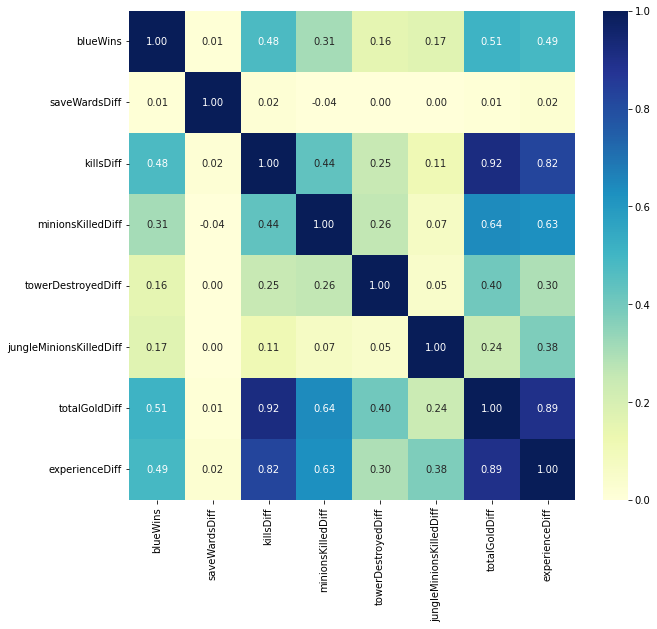

In [18]:
plt.figure(figsize=(10, 9))
sns.heatmap(df[preprocessing_using_cols].corr(), cmap = 'YlGnBu', annot=True, fmt='.2f', vmin=0)

plt.show()

In [19]:
preprocessing_using_cols = df[preprocessing_using_cols].columns[1:] # gameId 제외
df[preprocessing_using_cols].head()

,saveWardsDiff,killsDiff,minionsKilledDiff,towerDestroyedDiff,jungleMinionsKilledDiff,totalGoldDiff,experienceDiff
0,17,3,-2,0,-19,643,-16
1,0,0,-66,-1,-9,-2908,-2346
2,3,-4,-17,0,18,-1172,-2066
3,29,-1,-34,0,8,-1321,-14
4,56,0,-15,0,-10,-1004,460


In [20]:
X = df[preprocessing_using_cols] # preprocessing_using_cols
y = df['blueWins'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1,
                             max_depth=5
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7260458839406208


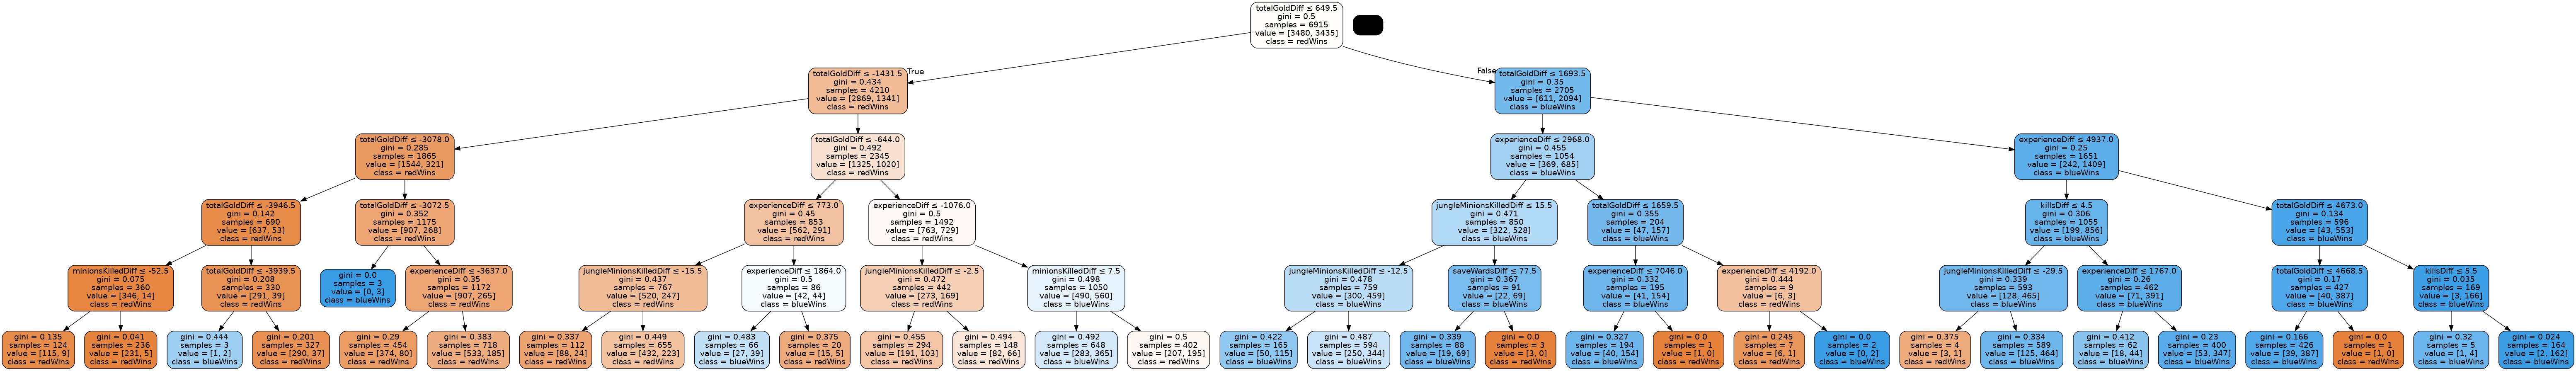

In [22]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=preprocessing_using_cols, 
                class_names=['redWins','blueWins']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('preprocessing_df.png')
Image(graph.create_png(), retina=True)

### 가설 4번 확인하기

In [23]:
df['totalJungleMinionsKilledDiff'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled']
df['assistsDiff'] = df['blueAssists'] - df['redAssists']
df['eliteMonstersDiff'] = df['blueEliteMonsters'] - df['redEliteMonsters']
df['dragonsDiff'] = df['blueDragons'] - df['redDragons']
df['heraldsDiff'] = df['blueHeralds'] - df['redHeralds']

# 필요한 columns 할당
jungler_cols = ['assistsDiff', 'eliteMonstersDiff', 'dragonsDiff', 'heraldsDiff', 'totalJungleMinionsKilledDiff']

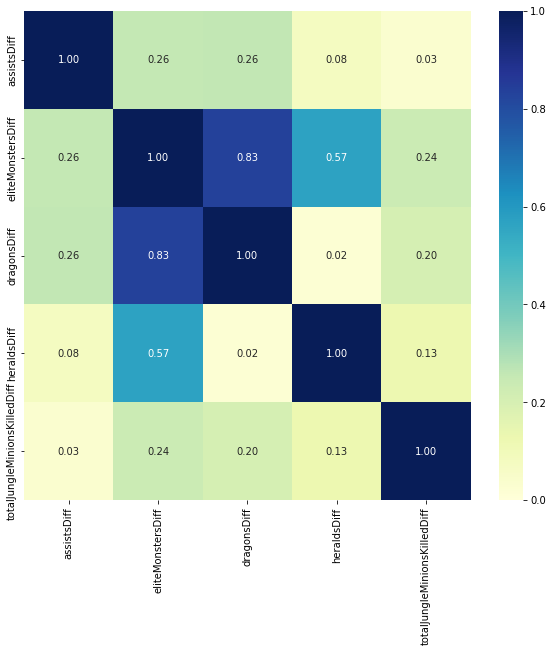

In [24]:
plt.figure(figsize=(10, 9))
sns.heatmap(df[jungler_cols].corr(), cmap = 'YlGnBu', annot=True, fmt='.2f', vmin=0)

plt.show()

In [25]:
X = df[jungler_cols] # jungler columns
y = df['blueWins'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1,
                             max_depth=5
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6902834008097166


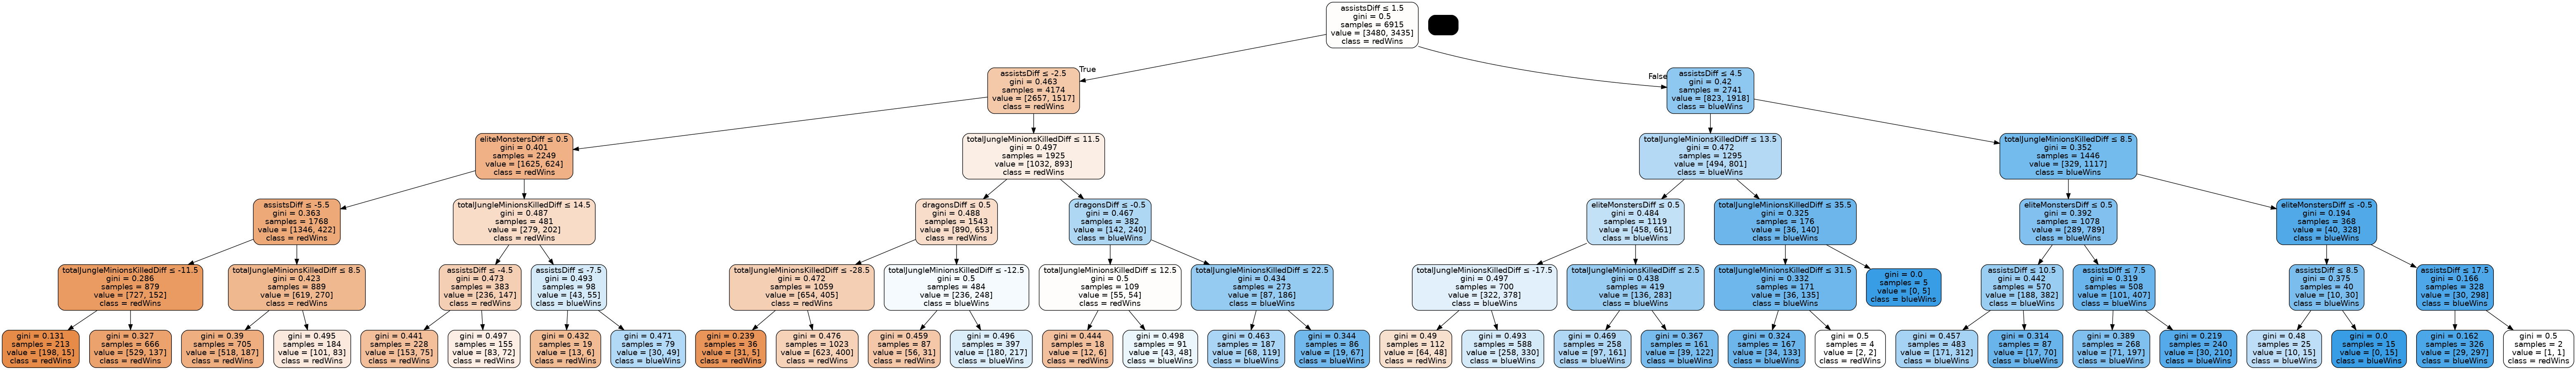

In [27]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=jungler_cols, 
                class_names=['redWins','blueWins']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jungler_df.png')
Image(graph.create_png(), retina=True)

# 4. 가설 결과

1. 롤은 시야가 중요하다. 시야를 통해 이득을 취할 수 있는 스노우볼을 굴릴 요소들을 쉽게 확인할 수 있다. 그래서 `WardsPlaced`, `WardsDestroyed`를 비교해 봤을 때 placed가 높을 수록 시야를 잘 먹었음을 의미하고 이는 곧 많은 이득을 얻어 게임을 승리로 이끄는 지표다.
> 중요하지 않다. 10분간의 데이터에서 와드를 구입하거나 설치하는 과정이 한정적이다. 그리고 시간상 시야 싸움을 시작하기 어려운 시간이다. 가설이 옳지 않았다.

2. 아이템이 잘 나와야 전투에서 승리하고 이는 게임의 승리를 야기한다. 아이템을 뽑기 위해 골드 수급이 상대편보다 원활해야 하는데, 이는 `Kills`, `Deaths`, `Assists`, `TowersDestroyed`, `TotalMinionsKilled`, `TotalJungleMinionsKilled`를 통해 알 수 있다. 그리고 이들을 잘 챙기면 경험치인 `ExperienceDiff`에서 차이가 날것이다.   
최종적으로 이들의 차이를 내포하고 있는 `GoldDiff` 지표가 승리에 가장 중요하다.
> 승리를 예측하기에 중요한 지표이다. decision tree의 상단 부분을 보면 `GoldDiff`를 중심으로 해당 수치의 범위에 따라 분류가 되고 있다. 그리고 값 분포의 끝부분을 보면 승리 확률이 더 극단적으로 나뉘고 있음을 볼 수 있다.

3. 데이터셋이 10분까지 데이터만 표현하고 있는 상황이다. `EliteMonsters`에 해당하는 `Dragons`와 `Heralds`는 각 5분 젠, 8분 젠이므로 최대 1개 표현이 가능하고, 전략적으로 이들을 무시하고 다른곳에 집중하는 경우도 많아 승리와 연관이 없을것이다.
> 승리와 크게 연관이 있지 않다. 1번 가설의 답변과 비슷하다. 시간상 10분의 데이터만 보고 확인하기 어렵다.

4. 정글러는 라이너들과 합류해 소규모 싸움에 쉽게 개입할 수 있는 큰 장점을 갖고 있다. 이는 초반 10분 정글러의 영향력이 매우 중요함을 말한다. 그래서 정글러와 직접적인 영향을 갖고 있는 `'Assists', 'EliteMonsters', 'Dragons', 'Heralds', 'TotalJungleMinionsKilled'` 지표가 승리에 중요하다.
> 의사결정나무의 결과물을 확인하면 다음과 같다.   
상대편보다 상대적인 어시스트 차이가 4.5개 이상일 경우부터 블루팀이 우세한 유의미한 결과 차이가 나기 시작한다. 하지만 `Dragons`, `Heralds` 같은 경우에는 크게 의미가 있어보이지 않는다. `Dragons`의 경우 경우의 수가 모두 나온 모습을 확인할 수 있고, `Heralds`는 아예 의사결정나무가 상관관계를 파악할 때 채용하지 않았다.

# 5. EDA로 가설의 결과 뜯어보기

### 와드와 관련된 데이터 살펴보기

<AxesSubplot:>

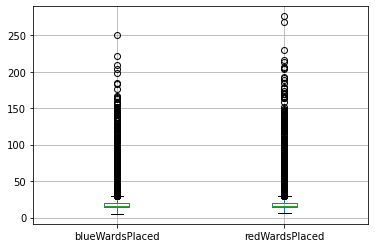

In [28]:
df.boxplot(['blueWardsPlaced', 'redWardsPlaced'])

특이점이 너무 많다. 10분도 안됐는데 왜 이렇게 와드 박은 수가 많은지 인과관계를 생각해보니, 게임을 망치는 트롤이나 게임이 빠르게 터지면 서렌하기 전까지 플레이어들이 가진 돈으로 와드만 사서 설치한 행위로 인해 생긴 것이라 판단했다.

In [29]:
ward_df = df[['blueWardsPlaced', 'blueWins', 'redWardsPlaced']]

In [30]:
a = np.mean(ward_df.blueWardsPlaced)
b = np.std(ward_df.blueWardsPlaced)
print(f'블루팀 와드 평균 : {a:.2f}, 블루팀 와드 편차 : {b:.2f}')

블루팀 와드 평균 : 22.29, 블루팀 와드 편차 : 18.02


In [31]:
ward_df.describe()

,blueWardsPlaced,blueWins,redWardsPlaced
count,9879.000000,9879.000000,9879.000000
mean,22.288288,0.499038,22.367952
std,18.019177,0.500024,18.457427
min,5.000000,0.000000,6.000000
25%,14.000000,0.000000,14.000000
50%,16.000000,0.000000,16.000000
75%,20.000000,1.000000,20.000000
max,250.000000,1.000000,276.000000


블루팀의 와드와 레드팀의 와드를 승패와 관련해서 확인해보려고 했지만, 평균이 거의 같은걸 확인할 수 있다. 이로써 __와드의 수는 승패에 전혀 영향을 미치지 않는 것을 확인할 수 있다.__

### 데이터를 시각화하고 뜯어보기

In [32]:
csv_path = os.getenv('HOME')+'/aiffel/AI_study/Hackathon/H01_lol/EDA.csv'
EDA = pd.read_csv(csv_path)

EDA.head()

,blueWins,blueFirstBlood,KDA,blueDragons,blueHeralds,blueTowersDestroyed,blueGoldDiff,blueExperienceDiff
0,0,1,3.33,0,0,0,643,-8
1,0,0,2.00,0,0,0,-2908,-1173
2,0,0,1.00,1,0,0,-1172,-1033
3,0,0,1.80,0,1,0,-1321,-7
4,0,0,2.00,0,0,0,-1004,230


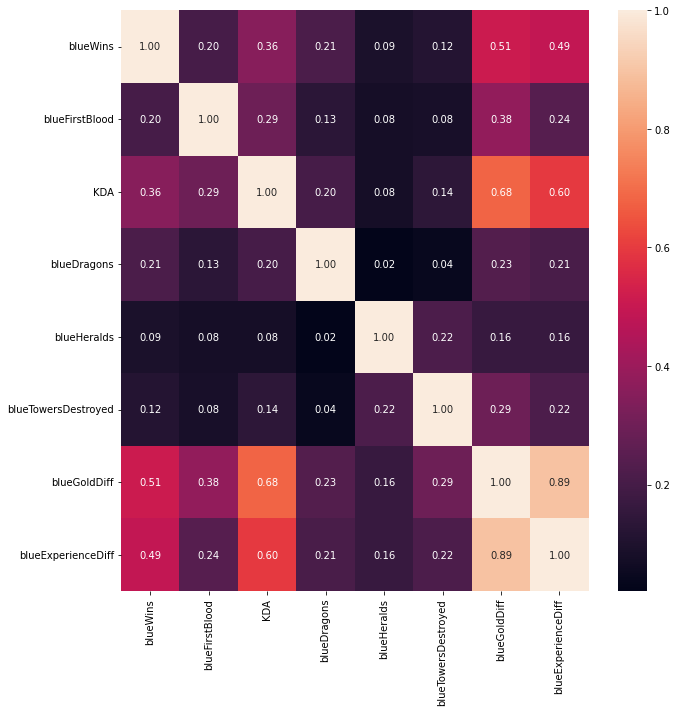

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(data = EDA.corr(),annot=True, fmt='.2f')
plt.tight_layout()

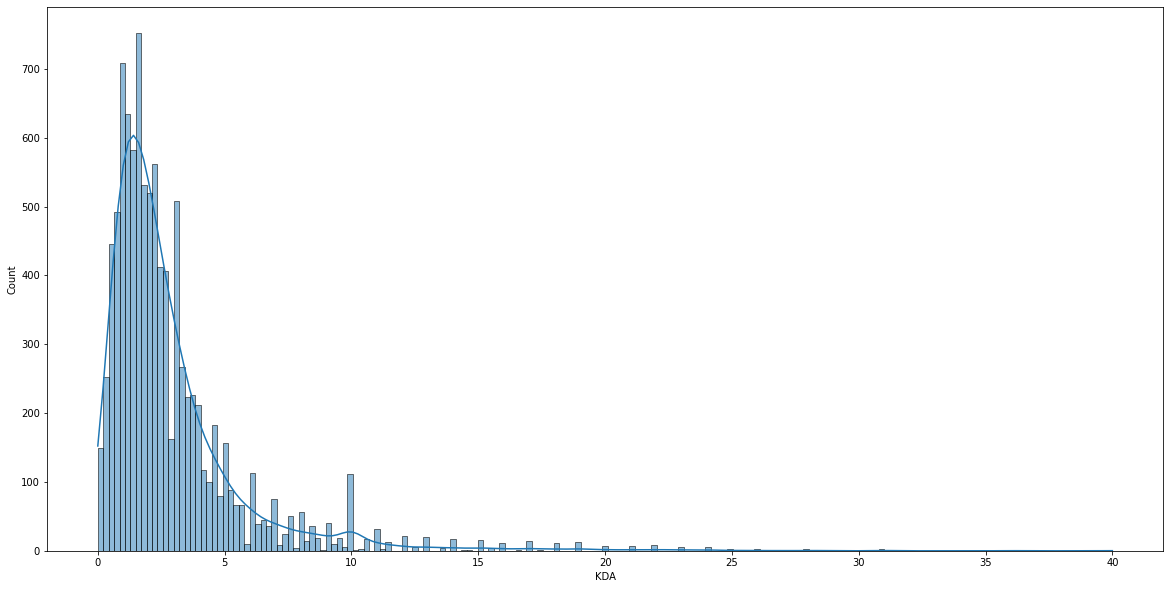

In [34]:
plt.figure(figsize=(20,10))
sns.histplot(EDA['KDA'], kde=True)
plt.show()

<AxesSubplot:xlabel='KDA', ylabel='blueWins'>

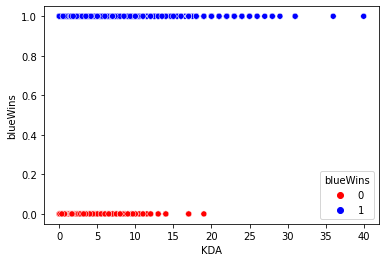

In [35]:
sns.scatterplot(x='KDA', y='blueWins', data=EDA, hue="blueWins", palette=['red', 'blue'])

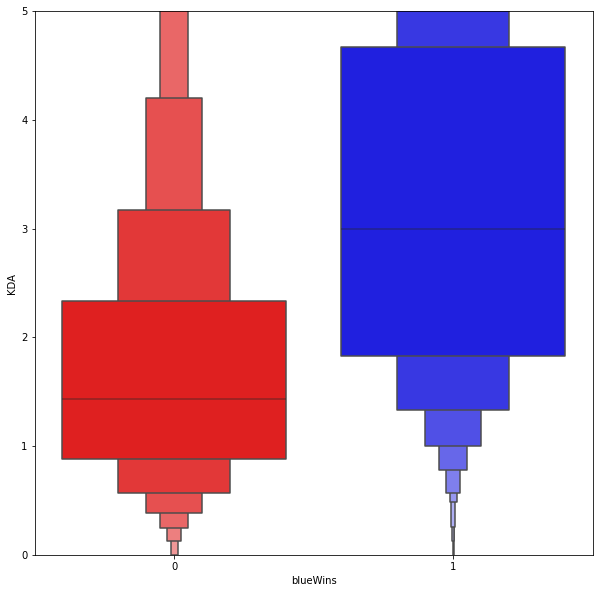

In [36]:
kdawin=EDA[['KDA','blueWins']]

plt.figure(figsize=(10,10))
sns.boxenplot(x='blueWins', y='KDA', data=kdawin, palette=['red', 'blue'])
plt.ylim([0, 5])
plt.show()

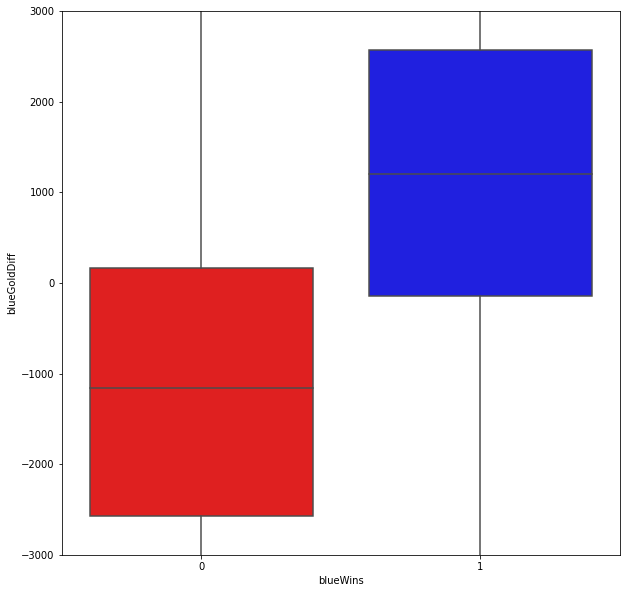

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x='blueWins', y='blueGoldDiff', data=EDA, palette=['red', 'blue'])
plt.ylim([-3000, 3000])
plt.show()

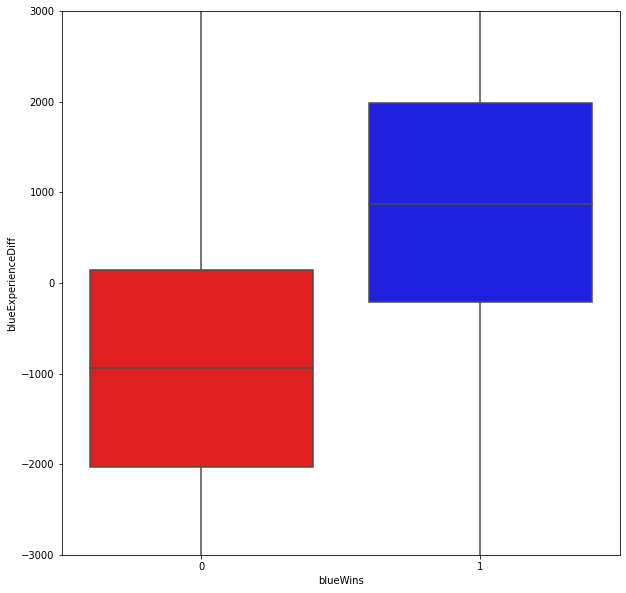

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x='blueWins', y='blueExperienceDiff', data=EDA, palette=['red', 'blue'])
plt.ylim([-3000, 3000])
plt.show()

In [39]:
EDA['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [40]:
fb = EDA.loc[EDA.blueFirstBlood == 0]
fb['blueWins'].value_counts()

0    2949
1    1943
Name: blueWins, dtype: int64

In [41]:
fb2 = EDA.loc[EDA.blueFirstBlood == 1]
fb2['blueWins'].value_counts()

1    2987
0    2000
Name: blueWins, dtype: int64